# Subsetting Stereographic Data

### With the toolbox, we used to do this:

In [1]:
import copernicusmarine as cmt
dataset = cmt.open_dataset(
    dataset_id="cmems_mod_arc_bgc_my_ecosmo_P1D-m", 
    variables=["chl", "zooc", "o2"], 
    minimum_latitude=60, 
    maximum_latitude=85, 
    minimum_longitude=-10, 
    maximum_longitude=180,
)
dataset

/Users/oricart/.asdf/installs/python/3.12.3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO - 2025-03-19T08:14:10Z - Selected dataset version: "202105"
INFO - 2025-03-19T08:14:10Z - Selected dataset part: "default"


<xarray.Dataset> Size: 5GB
Dimensions:    (time: 5844, depth: 1, latitude: 101, longitude: 761)
Coordinates:
  * depth      (depth) float32 4B 3.0
  * latitude   (latitude) float64 808B 60.0 60.25 60.5 60.75 ... 84.5 84.75 85.0
  * time       (time) datetime64[ns] 47kB 2007-01-01 2007-01-02 ... 2022-12-31
  * longitude  (longitude) float64 6kB -10.0 -9.75 -9.5 ... 179.5 179.8 180.0
Data variables:
    chl        (time, depth, latitude, longitude) float32 2GB dask.array<chunksize=(5110, 1, 30, 720), meta=np.ndarray>
    zooc       (time, depth, latitude, longitude) float32 2GB dask.array<chunksize=(5110, 1, 30, 720), meta=np.ndarray>
    o2         (time, depth, latitude, longitude) float32 2GB dask.array<chunksize=(5110, 1, 30, 720), meta=np.ndarray>
Attributes:
    title:        Arctic Ocean Biogeochemistry Reanalysis, 25km surface daily...
    history:      Created by program hyc2proj, version V0.3
    source:       NERSC-HYCOM model fields
    institution:  NERSC, Jahnebakken 3, 5006 Bergen, Norway
    Conventions:  CF-1.4
    references:   http://topaz.nersc.no

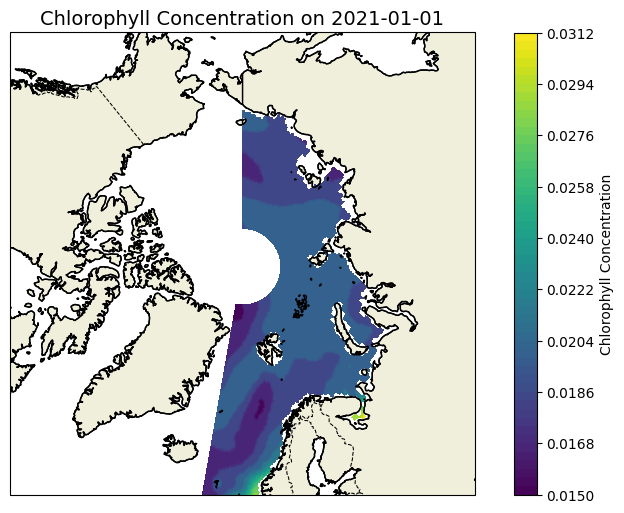

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Select chlorophyll data for the given date
chl = dataset.sel(time="2021-01-01").chl.squeeze() # No need for slice() if selecting one time

# Create figure and axis with PlateCarree projection
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.NorthPolarStereo()})

# Add geographical features
ax.set_extent([-180, 180, 60, 90], ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle="--", linewidth=0.75)
ax.add_feature(cfeature.LAND, edgecolor="black")

# Create filled contour plot
contour = ax.contourf(chl.longitude, chl.latitude, chl, levels=60, cmap='viridis', transform = ccrs.PlateCarree())

# Add colorbar
cbar = plt.colorbar(contour, ax=ax, orientation='vertical', fraction=0.046, pad=0.05)
cbar.set_label("Chlorophyll Concentration")

# Set title
ax.set_title("Chlorophyll Concentration on 2021-01-01", fontsize=14)

# Show the plot
plt.show()


### But now we implemented:

Notice that the variable input are different and the dataset_part is specified:
- from m\*imum_longitude and m\*imum_latitude, we set now m\*imum_x and m\*imum_y to limit the geographic subset.
- we need to specify the dataset part, as the originalGrid part shares the same 'dataset_id' with the lon/lat part.

To better understand this, you can also try to describe, with `copernicusmarine describe -i dataset_id` in the terminal.

In [4]:
import copernicusmarine as cmt
dataset = cmt.open_dataset(
    dataset_id="cmems_mod_arc_bgc_my_ecosmo_P1D-m", 
    variables=["chl", "zooc", "o2"], 
    minimum_y=-20, 
    maximum_y=20, 
    minimum_x=-20, 
    maximum_x=20,
    dataset_part="originalGrid"
)
dataset

INFO - 2025-03-19T08:14:36Z - Selected dataset version: "202105"
INFO - 2025-03-19T08:14:36Z - Selected dataset part: "originalGrid"
/Users/oricart/Library/CloudStorage/GoogleDrive-oriol.ricart@lobelia.earth/My Drive/Projects/copernicus-marine-toolbox/copernicusmarine/core_functions/custom_open_zarr.py:167: UserWarning: The specified chunks separate the stored chunks along dimension "y" starting at index 176. This could degrade performance. Instead, consider rechunking after loading.
  return xarray.open_zarr(store, **kwargs)
/Users/oricart/Library/CloudStorage/GoogleDrive-oriol.ricart@lobelia.earth/My Drive/Projects/copernicus-marine-toolbox/copernicusmarine/core_functions/custom_open_zarr.py:167: UserWarning: The specified chunks separate the stored chunks along dimension "x" starting at index 64. This could degrade performance. Instead, consider rechunking after loading.
  return xarray.open_zarr(store, **kwargs)


<xarray.Dataset> Size: 3GB
Dimensions:    (time: 5844, depth: 1, y: 161, x: 161)
Coordinates:
  * depth      (depth) float32 4B 3.0
    latitude   (y, x) float32 104kB dask.array<chunksize=(84, 64), meta=np.ndarray>
    longitude  (y, x) float32 104kB dask.array<chunksize=(84, 64), meta=np.ndarray>
  * time       (time) datetime64[ns] 47kB 2007-01-01 2007-01-02 ... 2022-12-31
  * x          (x) float32 644B -20.0 -19.75 -19.5 -19.25 ... 19.5 19.75 20.0
  * y          (y) float32 644B -20.0 -19.75 -19.5 -19.25 ... 19.5 19.75 20.0
Data variables:
    chl        (time, depth, y, x) float64 1GB dask.array<chunksize=(5844, 1, 84, 64), meta=np.ndarray>
    zooc       (time, depth, y, x) float64 1GB dask.array<chunksize=(5844, 1, 84, 64), meta=np.ndarray>
    o2         (time, depth, y, x) float32 606MB dask.array<chunksize=(5844, 1, 84, 64), meta=np.ndarray>
Attributes:
    title:        Arctic Ocean Biogeochemistry Reanalysis, 25km surface daily...
    history:      Created by program hyc2proj, version V0.3
    source:       NERSC-HYCOM model fields
    institution:  NERSC, Jahnebakken 3, 5006 Bergen, Norway
    Conventions:  CF-1.4
    references:   http://topaz.nersc.no

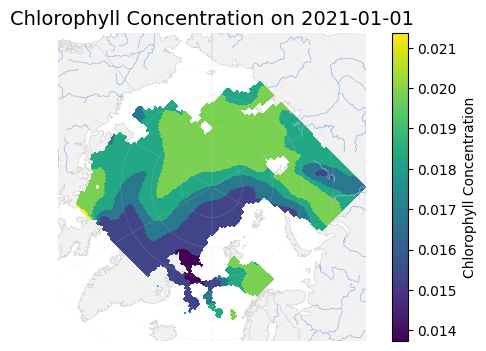

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Select chlorophyll data for the given date
chl = dataset.sel(time="2021-01-01").chl.squeeze() # No need for slice() if selecting one time

fig = plt.figure(figsize=(6.8,4.0), dpi=100)
    #fig = plt.figure(figsize=(10,8), dpi=100)
fig.patch.set_visible(True)
fig.set_facecolor("white")

# Create an "ax" from which we add the projection

ax = plt.axes(projection=ccrs.NorthPolarStereo())


gl2 = ax.gridlines(draw_labels=False, color = 'lightgray', linewidth=0.1)
gl2.right_labels = False
gl2.top_labels = False
ax.axis('off')

ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor="lightgray")
ax.add_feature(cfeature.RIVERS, linewidth=0.5)
ax.add_feature(cfeature.LAND, linewidth=0.5, facecolor='#f1f1f1', edgecolor='lightgray', zorder=1)
# ax.set_extent([-179, 179, 70, 90], crs=ccrs.PlateCarree())

# Create filled contour plot
contour = ax.pcolormesh(chl.x*100000, chl.y*100000, chl, cmap='viridis', transform = ccrs.NorthPolarStereo(central_longitude=45.0))

# # Add colorbar
cbar = plt.colorbar(contour, ax=ax, orientation='vertical', fraction=0.046, pad=0.05)
cbar.set_label("Chlorophyll Concentration")

# Set title
ax.set_title("Chlorophyll Concentration on 2021-01-01", fontsize=14)

# Show the plot
plt.show()

In [6]:
dataset.sel(longitude = slice(30, 40))

KeyError: "no index found for coordinate 'longitude'"

In [ ]:
dataset.longitude

<xarray.DataArray 'longitude' (y: 233, x: 241)> Size: 225kB
dask.array<getitem, shape=(233, 241), dtype=float32, chunksize=(188, 200), chunktype=numpy.ndarray>
Coordinates:
    latitude   (y, x) float32 225kB dask.array<chunksize=(188, 200), meta=np.ndarray>
    longitude  (y, x) float32 225kB dask.array<chunksize=(188, 200), meta=np.ndarray>
  * x          (x) float32 964B -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * y          (y) float32 932B -30.0 -29.75 -29.5 -29.25 ... 27.5 27.75 28.0
Attributes:
    standard_name:  longitude
    units:          degrees_east

# What about the CLI?

In [ ]:
# We used to do it like this, selecting longitude and latitude (still can be done)
!copernicusmarine subset -i cmems_mod_arc_bgc_my_ecosmo_P1D-m -o cmems_mod_arc_bgc_my_ecosmo_P1D-m_subset -v chl -v zooc -v o2 --minimum-latitude 60 --maximum-latitude 85 --minimum-longitude -10 --maximum-longitude 180 --dry-run

INFO - 2025-03-13T08:36:51Z - Selected dataset version: "202105"
INFO - 2025-03-13T08:36:51Z - Selected dataset part: "default"
{
  "file_path": "cmems_mod_arc_bgc_my_ecosmo_P1D-m_subset/cmems_mod_arc_bgc_my_ecosmo_P1D-m_chl-zooc-o2_10.00W-180.00E_60.00N-85.00N_10.00-180.00m_2007-01-01-2022-12-31.nc",
  "output_directory": "cmems_mod_arc_bgc_my_ecosmo_P1D-m_subset",
  "filename": "cmems_mod_arc_bgc_my_ecosmo_P1D-m_chl-zooc-o2_10.00W-180.00E_60.00N-85.00N_10.00-180.00m_2007-01-01-2022-12-31.nc",
  "file_size": 5143.246022900763,
  "data_transfer_size": 6902.291541984732,
  "variables": [
    "chl",
    "zooc",
    "o2"
  ],
  "coordinates_extent": [
    {
      "minimum": -10.0,
      "maximum": 180.0,
      "unit": "degrees_east",
      "coordinate_id": "longitude"
    },
    {
      "minimum": 60.0,
      "maximum": 85.0,
      "unit": "degrees_north",
      "coordinate_id": "latitude"
    },
    {
      "minimum": "2007-01-01T00:00:00+00:00",
      "maximum": "2022-12-31T00:00:00+00:

In [ ]:
# We want to specify the part 
!copernicusmarine subset -i cmems_mod_arc_bgc_my_ecosmo_P1D-m -v chl -v zooc -v o2 --minimum-latitude 60 --maximum-latitude 85 --minimum-longitude -10 --maximum-longitude 180 --dry-run --dataset-part originalGrid

ERROR - 2025-03-13T08:39:33Z - Lon lat subset not available in original grid datasets: You cannot specify longitude and latitude when using the 'originalGrid' dataset part yet. Try using ``--minimum-x``, ``--maximum-x``, ``--minimum-y`` and ``--maximum-y``.


In [ ]:
# If we specify an originalGrid part, we need to select the correct variables:
!copernicusmarine subset -i cmems_mod_arc_bgc_my_ecosmo_P1D-m -v chl -v zooc -v o2 --minimum-y 25 --maximum-y 85 --minimum-x -10 --maximum-x 180 --dry-run --dataset-part originalGrid

INFO - 2025-03-13T08:39:40Z - Selected dataset version: "202105"
INFO - 2025-03-13T08:39:40Z - Selected dataset part: "originalGrid"
WARNING - 2025-03-13T08:39:42Z - Some of your subset selection [25.0, 85.0] for the y dimension exceed the dataset coordinates [-43.0, 28.0]
WARNING - 2025-03-13T08:39:42Z - Some of your subset selection [-10.0, 180.0] for the x dimension exceed the dataset coordinates [-36.0, 38.0]
{
  "file_path": "cmems_mod_arc_bgc_my_ecosmo_P1D-m_chl-zooc-o2_-10.00x_38.00X_25.00y_28.00Y_10.00-38.00m_2007-01-01-2022-12-31.nc",
  "output_directory": ".",
  "filename": "cmems_mod_arc_bgc_my_ecosmo_P1D-m_chl-zooc-o2_-10.00x_38.00X_25.00y_28.00Y_10.00-38.00m_2007-01-01-2022-12-31.nc",
  "file_size": 111.94121374045802,
  "data_transfer_size": 575.190961832061,
  "variables": [
    "chl",
    "zooc",
    "o2"
  ],
  "coordinates_extent": [
    {
      "minimum": -10.0,
      "maximum": 38.0,
      "unit": "100  km",
      "coordinate_id": "x"
    },
    {
      "minimum": 2

In [ ]:
# And we can also use the shortcuts for either variable
!copernicusmarine subset -i cmems_mod_arc_bgc_my_ecosmo_P1D-m -v chl -v zooc -v o2 -y 25 -Y 85 -x -10 -X 180 --dry-run --dataset-part originalGrid

INFO - 2025-03-13T09:16:51Z - Selected dataset version: "202105"
INFO - 2025-03-13T09:16:51Z - Selected dataset part: "originalGrid"
WARNING - 2025-03-13T09:16:54Z - Some of your subset selection [25.0, 85.0] for the y dimension exceed the dataset coordinates [-43.0, 28.0]
WARNING - 2025-03-13T09:16:54Z - Some of your subset selection [-10.0, 180.0] for the x dimension exceed the dataset coordinates [-36.0, 38.0]
{
  "file_path": "cmems_mod_arc_bgc_my_ecosmo_P1D-m_chl-zooc-o2_-10.00x_38.00X_25.00y_28.00Y_10.00-38.00m_2007-01-01-2022-12-31.nc",
  "output_directory": ".",
  "filename": "cmems_mod_arc_bgc_my_ecosmo_P1D-m_chl-zooc-o2_-10.00x_38.00X_25.00y_28.00Y_10.00-38.00m_2007-01-01-2022-12-31.nc",
  "file_size": 111.94121374045802,
  "data_transfer_size": 575.190961832061,
  "variables": [
    "chl",
    "zooc",
    "o2"
  ],
  "coordinates_extent": [
    {
      "minimum": -10.0,
      "maximum": 38.0,
      "unit": "100  km",
      "coordinate_id": "x"
    },
    {
      "minimum": 2

In [ ]:
# it will automatically consider x and y as the dataset part needs.
!copernicusmarine subset -i cmems_mod_arc_bgc_my_ecosmo_P1D-m -v chl -v zooc -v o2 -y 25 -Y 85 -x -10 -X 180 --dry-run

INFO - 2025-03-13T08:41:10Z - Selected dataset version: "202105"
INFO - 2025-03-13T08:41:10Z - Selected dataset part: "default"
WARNING - 2025-03-13T08:41:13Z - Some of your subset selection [25.0, 85.0] for the latitude dimension exceed the dataset coordinates [43.5, 90.0]
{
  "file_path": "cmems_mod_arc_bgc_my_ecosmo_P1D-m_chl-zooc-o2_10.00W-180.00E_43.50N-85.00N_10.00-180.00m_2007-01-01-2022-12-31.nc",
  "output_directory": ".",
  "filename": "cmems_mod_arc_bgc_my_ecosmo_P1D-m_chl-zooc-o2_10.00W-180.00E_43.50N-85.00N_10.00-180.00m_2007-01-01-2022-12-31.nc",
  "file_size": 8504.170572519084,
  "data_transfer_size": 10353.4373129771,
  "variables": [
    "chl",
    "zooc",
    "o2"
  ],
  "coordinates_extent": [
    {
      "minimum": -10.0,
      "maximum": 180.0,
      "unit": "degrees_east",
      "coordinate_id": "longitude"
    },
    {
      "minimum": 43.5,
      "maximum": 85.0,
      "unit": "degrees_north",
      "coordinate_id": "latitude"
    },
    {
      "minimum": "200

# How about when data is in 'm' instead of 'km'?

In [ ]:
# How do we make users understand the subset when trying to subset with meters?
# The numbers needed to specified are quite big.
!copernicusmarine subset -i cmems_mod_arc_phy_my_hflux_P1M-m -y 25000 -Y 850000 -x -10000 -X 1800000 --dry-run --dataset-part originalGrid

INFO - 2025-03-13T09:18:54Z - Selected dataset version: "202411"
INFO - 2025-03-13T09:18:54Z - Selected dataset part: "originalGrid"
{
  "file_path": "cmems_mod_arc_phy_my_hflux_P1M-m_hfds-rsntds_0.00x_1800000.00X_25000.00y_850000.00Y_1991-01-01-2023-12-01.nc",
  "output_directory": ".",
  "filename": "cmems_mod_arc_phy_my_hflux_P1M-m_hfds-rsntds_0.00x_1800000.00X_25000.00y_850000.00Y_1991-01-01-2023-12-01.nc",
  "file_size": 29.380480916030535,
  "data_transfer_size": 100.05496183206107,
  "variables": [
    "hfds",
    "rsntds"
  ],
  "coordinates_extent": [
    {
      "minimum": 0.0,
      "maximum": 1800000.0,
      "unit": "meter",
      "coordinate_id": "x"
    },
    {
      "minimum": 25000.0,
      "maximum": 850000.0,
      "unit": "meter",
      "coordinate_id": "y"
    },
    {
      "minimum": "1991-01-01T00:00:00+00:00",
      "maximum": "2023-12-01T00:00:00+00:00",
      "unit": "iso8601",
      "coordinate_id": "time"
    }
  ],
  "status": "001",
  "message": "The req

In [ ]:
!copernicusmarine describe -i cmems_mod_arc_phy_my_hflux_P1M-m

Fetching catalogue: 100%|█████████████████████████| 2/2 [00:00<00:00,  2.97it/s]
{
  "products": [
    {
      "title": "Arctic Ocean Physics Reanalysis",
      "product_id": "ARCTIC_MULTIYEAR_PHY_002_003",
      "thumbnail_url": "https://mdl-metadata.s3.waw3-1.cloudferro.com/metadata/thumbnails/ARCTIC_MULTIYEAR_PHY_002_003.jpg",
      "description": "The current version of the TOPAZ system - TOPAZ4b -  is nearly identical to the real-time forecast system run at MET Norway. It uses a recent version of the Hybrid Coordinate Ocean Model (HYCOM) developed at University of Miami (Bleck 2002). HYCOM is coupled to a sea ice model; ice thermodynamics are described in Drange and Simonsen (1996) and the elastic-viscous-plastic rheology in Hunke and Dukowicz (1997). The model's native grid covers the Arctic and North Atlantic Oceans,  has fairly homogeneous horizontal spacing (between 11 and 16 km). 50 hybrid layers are used in the vertical (z-isopycnal). TOPAZ4b uses the Deterministic version o

# List of datasets that have original projection
We finally include a list of datasets that have the originalGrid dataset part, ni case you want to play around with the datasets.

In [ ]:
datasets_w_originalGrid = [
["cmems_mod_arc_bgc_anfc_ecosmo_P1D-m"],
["cmems_mod_arc_bgc_anfc_ecosmo_P1M-m"],
["cmems_mod_arc_phy_anfc_6km_detided_PT1H-i"],
["cmems_mod_arc_phy_anfc_6km_detided_PT6H-m"],
["cmems_mod_arc_phy_anfc_6km_detided_P1D-m"],
["cmems_mod_arc_phy_anfc_6km_detided_P1M-m"],
["cmems_mod_arc_bgc_my_ecosmo_P1D-m"],
["cmems_mod_arc_bgc_my_ecosmo_P1M"],
["cmems_mod_arc_bgc_my_ecosmo_P1Y"],
["cmems_mod_arc_phy_my_topaz4_P1D-m"],
["cmems_mod_arc_phy_my_topaz4_P1M"],
["cmems_mod_arc_phy_my_topaz4_P1Y"],
["cmems_mod_arc_phy_my_hflux_P1D-m"],
["cmems_mod_arc_phy_my_hflux_P1M-m"],
["cmems_mod_arc_phy_my_mflux_P1D-m",],
["cmems_mod_arc_phy_my_mflux_P1M-m"],
["cmems_mod_arc_phy_my_nextsim_P1M-m"],
["DMI-ARC-SEAICE_BERG_IW-L4-NRT-OBS"],
["DMI-ARC-SEAICE_BERG_MOSAIC_IW-L4-NRT-OBS"],
["cmems_obs-wind_arc_phy_my_l3-s1a-sar-asc-0.01deg_P1D-i"],
["cmems_obs-wind_arc_phy_my_l3-s1a-sar-desc-0.01deg_P1D-i"]
]